In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Importing Datasets
#Delimiters as tabs and encoding is ISO-8859-1
companies = pd.read_csv('https://cdn.upgrad.com/UpGrad/temp/d934844e-5182-4b58-b896-4ba2a499aa57/companies.txt',sep = '\t'
                   ,encoding = 'ISO-8859-1')
rounds2 = pd.read_csv('C:/Users/shubu/Desktop/Upgrad-AI ML Course/Assignments/rounds2.csv',encoding = 'ISO-8859-1')

In [3]:
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [4]:
#Cleaning Data by removing special characters
companies['permalink'] = companies['permalink'].str.lower().str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
companies['name'] = companies['name'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
rounds2['company_permalink'] = rounds2['company_permalink'].str.lower().str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
rounds2['funding_round_permalink'] = rounds2['funding_round_permalink'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')

In [5]:
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [6]:
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [7]:
# Checking Dimensions and data quality
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
permalink        66368 non-null object
name             66367 non-null object
homepage_url     61310 non-null object
category_list    63220 non-null object
status           66368 non-null object
country_code     59410 non-null object
state_code       57821 non-null object
region           58338 non-null object
city             58340 non-null object
founded_at       51147 non-null object
dtypes: object(10)
memory usage: 5.1+ MB


In [8]:
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [9]:
rounds2['company_permalink'].describe()

count                       114949
unique                       66369
top       /organization/solarflare
freq                            19
Name: company_permalink, dtype: object

In [10]:
# No of unique Companies in companies Dataframe
#companies.describe()
companies['name'].unique().shape

(66103,)

In [11]:
companies['permalink'].unique().shape

(66368,)

In [12]:
rounds2_sets = set(rounds2['company_permalink'])
company_sets = set(companies['permalink'])

In [13]:
#diff = rounds2_sets.intersection(company_sets)
diff = rounds2_sets - company_sets

In [14]:
#Companies present in rounds2 but not in company
diff

{'/organization/energystone-games-cc3  ',
 '/organization/huizuche-com- cye12',
 '/organization/magnet-tech-cc3c',
 '/organization/tipcat-interactive-2eya c'}

In [15]:
master_frame = pd.merge(companies,rounds2,how = 'inner',left_on = 'permalink',right_on = 'company_permalink')

In [16]:
master_frame.shape

(114945, 16)

In [17]:
master_frame.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [18]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114945 entries, 0 to 114944
Data columns (total 16 columns):
permalink                  114945 non-null object
name                       114944 non-null object
homepage_url               108812 non-null object
category_list              111536 non-null object
status                     114945 non-null object
country_code               106271 non-null object
state_code                 104003 non-null object
region                     104782 non-null object
city                       104785 non-null object
founded_at                 94424 non-null object
company_permalink          114945 non-null object
funding_round_permalink    114945 non-null object
funding_round_type         114945 non-null object
funding_round_code         31140 non-null object
funded_at                  114945 non-null object
raised_amount_usd          94958 non-null float64
dtypes: float64(1), object(15)
memory usage: 14.9+ MB


In [19]:
#Dropping rows having NAN as raised_amount_usd
master_frame = master_frame.dropna(subset = ['raised_amount_usd'])

In [20]:
master_frame.shape

(94958, 16)

In [21]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94958 entries, 0 to 114944
Data columns (total 16 columns):
permalink                  94958 non-null object
name                       94957 non-null object
homepage_url               90626 non-null object
category_list              93914 non-null object
status                     94958 non-null object
country_code               89108 non-null object
state_code                 87355 non-null object
region                     87911 non-null object
city                       87914 non-null object
founded_at                 78992 non-null object
company_permalink          94958 non-null object
funding_round_permalink    94958 non-null object
funding_round_type         94958 non-null object
funding_round_code         28169 non-null object
funded_at                  94958 non-null object
raised_amount_usd          94958 non-null float64
dtypes: float64(1), object(15)
memory usage: 12.3+ MB


In [22]:
#Number of missing values in each column
master_frame.isna().sum()

permalink                      0
name                           1
homepage_url                4332
category_list               1044
status                         0
country_code                5850
state_code                  7603
region                      7047
city                        7044
founded_at                 15966
company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         66789
funded_at                      0
raised_amount_usd              0
dtype: int64

In [23]:
#Concluding that removing 20% of data with missing values would not make any difference apart from "funding_round_code" which 
#almost 50% of data
master_frame = master_frame.dropna(subset = ['name','homepage_url','category_list','country_code','state_code','region','city'
                                             ,'founded_at'])

In [124]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71580 entries, 2 to 114943
Data columns (total 16 columns):
permalink                  71580 non-null object
name                       71580 non-null object
homepage_url               71580 non-null object
category_list              71580 non-null object
status                     71580 non-null object
country_code               71580 non-null object
state_code                 71580 non-null object
region                     71580 non-null object
city                       71580 non-null object
founded_at                 71580 non-null object
company_permalink          71580 non-null object
funding_round_permalink    71580 non-null object
funding_round_type         71580 non-null object
funding_round_code         22044 non-null object
funded_at                  71580 non-null object
raised_amount_usd          71580 non-null float64
dtypes: float64(1), object(15)
memory usage: 9.3+ MB


In [24]:
master_frame.shape

(71580, 16)

In [25]:
#Getting average of each funding type
test_pt = master_frame.pivot_table(values = 'raised_amount_usd', index = 'funding_round_type',aggfunc = np.mean).sort_values(by ='raised_amount_usd',ascending = False)
test_pt

,raised_amount_usd
funding_round_type,
post_ipo_debt,1.481366e+08
private_equity,7.329669e+07
post_ipo_equity,6.986425e+07
secondary_market,6.421114e+07
debt_financing,1.731285e+07
undisclosed,1.463206e+07
venture,1.212439e+07
grant,4.549668e+06
convertible_note,1.321638e+06


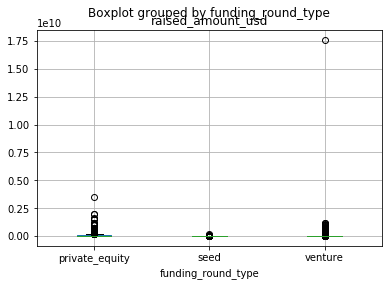

In [26]:

test_data1 = master_frame.loc[(master_frame.funding_round_type == 'seed') | (master_frame.funding_round_type == 'venture') |
                                                                     (master_frame.funding_round_type == 'private_equity')] 
                                                                     
box_plot1 = test_data1.boxplot(column =['raised_amount_usd'],by = 'funding_round_type')

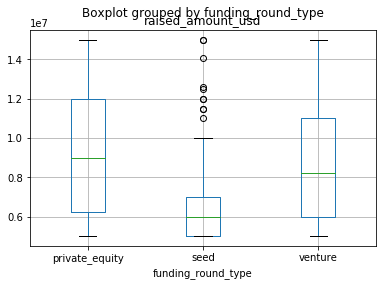

In [27]:
test_data = master_frame.loc[(master_frame.raised_amount_usd >=5000000) & (master_frame.raised_amount_usd <=15000000)]
test_data = test_data.loc[(test_data.funding_round_type == 'seed') | (test_data.funding_round_type == 'venture') |
                                                                     (test_data.funding_round_type == 'private_equity')]
box_plot = test_data.boxplot(column =['raised_amount_usd'],by = 'funding_round_type')

In [29]:
#By Business Analysis filtering out investment between 5-15 million USD
Representation_table = test_pt.loc[(test_pt.raised_amount_usd >=5000000) & (test_pt.raised_amount_usd <=15000000)]

In [30]:
Representation_table #We are choosing Venture to invest in as the most Representation Value lies between 5-15 million 
# and max investment also happened in this type.

,raised_amount_usd
funding_round_type,
undisclosed,1.463206e+07
venture,1.212439e+07


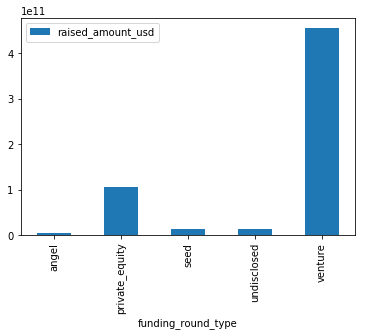

In [31]:
#Getting sum of each funding type
test_pt1 = master_frame.pivot_table(values = 'raised_amount_usd', index = 'funding_round_type',aggfunc = np.sum).sort_values(by ='raised_amount_usd',ascending = False)
test_pt1 = test_pt1.loc[['angel','private_equity','seed','undisclosed','venture']]
#test_pt1.boxplot(column =['raised_amount_usd'] ,by = 'funding_round_type')
test_pt1.plot.bar()
# We got to know max. amount of investment is done in venture

In [32]:
test_data.describe()

,raised_amount_usd
count,1.313200e+04
mean,8.855692e+06
std,3.071625e+06
min,5.000000e+06
25%,6.000000e+06
50%,8.100000e+06
75%,1.100000e+07
max,1.500000e+07


In [33]:
# Check Point 3 Analysis
master_frame_venture = master_frame.loc[(master_frame.funding_round_type == 'venture')]
    

In [34]:
master_frame_venture.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37526 entries, 4 to 114933
Data columns (total 16 columns):
permalink                  37526 non-null object
name                       37526 non-null object
homepage_url               37526 non-null object
category_list              37526 non-null object
status                     37526 non-null object
country_code               37526 non-null object
state_code                 37526 non-null object
region                     37526 non-null object
city                       37526 non-null object
founded_at                 37526 non-null object
company_permalink          37526 non-null object
funding_round_permalink    37526 non-null object
funding_round_type         37526 non-null object
funding_round_code         21935 non-null object
funded_at                  37526 non-null object
raised_amount_usd          37526 non-null float64
dtypes: float64(1), object(15)
memory usage: 4.9+ MB


In [35]:
master_frame_venture.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0
8,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.0
10,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,20000000.0
11,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,NaN,03-01-2013,1700000.0
12,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,A,19-07-2014,8900000.0


In [36]:
#Here are the top-9 countries with max investments
top9 = master_frame_venture.pivot_table(values = 'raised_amount_usd', index = 'country_code',aggfunc = np.sum).sort_values(by ='raised_amount_usd',ascending = False).head(9)
top9
# Top 3 are USA, Great Britain and India

,raised_amount_usd
country_code,
USA,3.505734e+11
CHN,2.839279e+10
GBR,1.435488e+10
IND,1.270108e+10
CAN,7.380625e+09
ISR,5.904596e+09
DEU,5.289190e+09
FRA,5.021598e+09
SWE,2.637514e+09


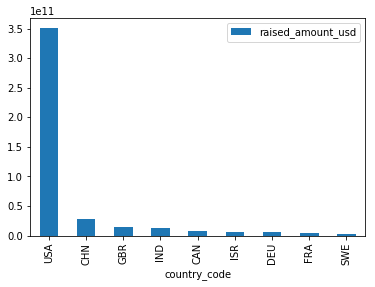

In [37]:
top9.plot.bar()

In [38]:
#CheckPoint 4: Sector Analysis
#Extracting the primary Sector Data from master_frame_venture
new = master_frame_venture['category_list'].str.split("|",1,expand = True)
master_frame_venture['primary_sector'] = new[0]
master_frame_venture.shape

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


(37526, 17)

In [39]:
#master_frame_venture.columns
master_frame_venture1 = master_frame_venture.drop(['category_list'],axis = 1)
master_frame_venture1.head()

,permalink,name,homepage_url,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector
4,/organization/0-6-com,0-6.com,http://www.0-6.com,operating,CHN,22,Beijing,Beijing,01-01-2007,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,Curated Web
8,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.0,Biotechnology
10,/organization/0xdata,H2O.ai,http://h2o.ai/,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,20000000.0,Analytics
11,/organization/0xdata,H2O.ai,http://h2o.ai/,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,NaN,03-01-2013,1700000.0,Analytics
12,/organization/0xdata,H2O.ai,http://h2o.ai/,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,A,19-07-2014,8900000.0,Analytics


In [40]:
mappings = pd.read_csv('C:/Users/shubu/Desktop/Upgrad-AI ML Course/Assignments/mapping.csv',encoding = 'ISO-8859-1')

In [41]:
mappings['category_list'] = mappings['category_list'].replace(to_replace=r'0', value='na', regex=True)

In [43]:
mappings.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [59]:
master_frame_mapped = pd.merge(master_frame_venture1,mappings,how = 'inner',left_on = 'primary_sector',right_on = 'category_list')

In [60]:
master_frame_mapped.columns

Index(['permalink', 'name', 'homepage_url', 'status', 'country_code',
       'state_code', 'region', 'city', 'founded_at', 'company_permalink',
       'funding_round_permalink', 'funding_round_type', 'funding_round_code',
       'funded_at', 'raised_amount_usd', 'primary_sector', 'category_list',
       'Automotive & Sports', 'Blanks', 'Cleantech / Semiconductors',
       'Entertainment', 'Health', 'Manufacturing',
       'News, Search and Messaging', 'Others',
       'Social, Finance, Analytics, Advertising'],
      dtype='object')

In [61]:
master_frame_mapped.head()

,permalink,name,homepage_url,status,country_code,state_code,region,city,founded_at,company_permalink,...,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,/organization/0-6-com,0-6.com,http://www.0-6.com,operating,CHN,22,Beijing,Beijing,01-01-2007,/organization/0-6-com,...,Curated Web,0,0,0,0,0,0,1,0,0
1,/organization/1000memories,1000memories,http://1000memories.com,acquired,USA,CA,SF Bay Area,San Francisco,01-07-2010,/organization/1000memories,...,Curated Web,0,0,0,0,0,0,1,0,0
2,/organization/1000museums-com,1000museums.com,http://www.1000museums.com,operating,USA,MA,MA - Other,Lenox,01-01-2008,/organization/1000museums-com,...,Curated Web,0,0,0,0,0,0,1,0,0
3,/organization/1000museums-com,1000museums.com,http://www.1000museums.com,operating,USA,MA,MA - Other,Lenox,01-01-2008,/organization/1000museums-com,...,Curated Web,0,0,0,0,0,0,1,0,0
4,/organization/1000museums-com,1000museums.com,http://www.1000museums.com,operating,USA,MA,MA - Other,Lenox,01-01-2008,/organization/1000museums-com,...,Curated Web,0,0,0,0,0,0,1,0,0


In [62]:
master_frame_mapped.columns

Index(['permalink', 'name', 'homepage_url', 'status', 'country_code',
       'state_code', 'region', 'city', 'founded_at', 'company_permalink',
       'funding_round_permalink', 'funding_round_type', 'funding_round_code',
       'funded_at', 'raised_amount_usd', 'primary_sector', 'category_list',
       'Automotive & Sports', 'Blanks', 'Cleantech / Semiconductors',
       'Entertainment', 'Health', 'Manufacturing',
       'News, Search and Messaging', 'Others',
       'Social, Finance, Analytics, Advertising'],
      dtype='object')

In [65]:
master_frame_mapped = master_frame_mapped.drop(columns = "category_list")
master_frame_mapped.columns

Index(['permalink', 'name', 'homepage_url', 'status', 'country_code',
       'state_code', 'region', 'city', 'founded_at', 'company_permalink',
       'funding_round_permalink', 'funding_round_type', 'funding_round_code',
       'funded_at', 'raised_amount_usd', 'primary_sector',
       'Automotive & Sports', 'Blanks', 'Cleantech / Semiconductors',
       'Entertainment', 'Health', 'Manufacturing',
       'News, Search and Messaging', 'Others',
       'Social, Finance, Analytics, Advertising'],
      dtype='object')

In [66]:
#Check Point 5 : Sector Analysis 2
sector_data = pd.melt(master_frame_mapped, id_vars = ['permalink', 'name', 'homepage_url', 'status', 'country_code',
       'state_code', 'region', 'city', 'founded_at', 'company_permalink',
       'funding_round_permalink', 'funding_round_type', 'funding_round_code',
       'funded_at', 'raised_amount_usd', 'primary_sector'], 
             value_vars = ['Automotive & Sports', 'Blanks', 'Cleantech / Semiconductors',
       'Entertainment', 'Health', 'Manufacturing',
       'News, Search and Messaging', 'Others',
       'Social, Finance, Analytics, Advertising'], var_name = 'main_sector')
sector_data

,permalink,name,homepage_url,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector,main_sector,value
0,/organization/0-6-com,0-6.com,http://www.0-6.com,operating,CHN,22,Beijing,Beijing,01-01-2007,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,Curated Web,Automotive & Sports,0
1,/organization/1000memories,1000memories,http://1000memories.com,acquired,USA,CA,SF Bay Area,San Francisco,01-07-2010,/organization/1000memories,/funding-round/502bd0e50c27616995e4bdad24605ef8,venture,A,16-02-2011,2520000.0,Curated Web,Automotive & Sports,0
2,/organization/1000museums-com,1000museums.com,http://www.1000museums.com,operating,USA,MA,MA - Other,Lenox,01-01-2008,/organization/1000museums-com,/funding-round/13be128d655076a025221d7fddc90d68,venture,NaN,14-10-2009,265940.0,Curated Web,Automotive & Sports,0
3,/organization/1000museums-com,1000museums.com,http://www.1000museums.com,operating,USA,MA,MA - Other,Lenox,01-01-2008,/organization/1000museums-com,/funding-round/6aeb32ab3fc05db2b606d7a2466e8c09,venture,NaN,15-01-2014,2906832.0,Curated Web,Automotive & Sports,0
4,/organization/1000museums-com,1000museums.com,http://www.1000museums.com,operating,USA,MA,MA - Other,Lenox,01-01-2008,/organization/1000museums-com,/funding-round/89317984885b44f02e4befb9dc2e588c,venture,NaN,01-08-2014,1500000.0,Curated Web,Automotive & Sports,0
5,/organization/1000museums-com,1000museums.com,http://www.1000museums.com,operating,USA,MA,MA - Other,Lenox,01-01-2008,/organization/1000museums-com,/funding-round/fd1b3064232ba9b3cfb5653a619e82e8,venture,NaN,05-04-2011,642000.0,Curated Web,Automotive & Sports,0
6,/organization/2houses,2houses,http://www.2houses.com,operating,BEL,1,Brussels,Bel,01-05-2011,/organization/2houses,/funding-round/f139ed46e2a848b181354542b71c8ff4,venture,A,09-11-2012,860102.0,Curated Web,Automotive & Sports,0
7,/organization/58-com,58.com,http://www.58.com,ipo,CHN,19,CHN - Other,Chaoyang,01-01-2005,/organization/58-com,/funding-round/206c6e5ac4c2b97e40b3404b9a485609,venture,A,01-02-2006,5000000.0,Curated Web,Automotive & Sports,0
8,/organization/58-com,58.com,http://www.58.com,ipo,CHN,19,CHN - Other,Chaoyang,01-01-2005,/organization/58-com,/funding-round/2195a55e5a77f5b596322cbe3a656664,venture,B,28-05-2008,5780000.0,Curated Web,Automotive & Sports,0
9,/organization/58-com,58.com,http://www.58.com,ipo,CHN,19,CHN - Other,Chaoyang,01-01-2005,/organization/58-com,/funding-round/65c94746ea9bcbcaab7c18b9346179ae,venture,NaN,21-04-2010,15000000.0,Curated Web,Automotive & Sports,0


In [67]:
sector_data.shape

(336474, 18)

In [68]:
sector_data = sector_data.loc[(sector_data['value'] >= 1)]

In [69]:
sector_data = sector_data.drop(columns = "value")

In [71]:
sector_data.head()

,permalink,name,homepage_url,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector,main_sector
24492,/organization/3d-robotics,3D Robotics,http://3drobotics.com,operating,USA,CA,San Diego,San Diego,01-01-2009,/organization/3d-robotics,/funding-round/2785595770e91ab8fd4854ef125ec563,venture,A,05-11-2012,5000000.0,Drones,Automotive & Sports
24493,/organization/3d-robotics,3D Robotics,http://3drobotics.com,operating,USA,CA,San Diego,San Diego,01-01-2009,/organization/3d-robotics,/funding-round/7ca0d4dc119b6d65eebfb352c3544542,venture,C,23-04-2015,14000000.0,Drones,Automotive & Sports
24494,/organization/3d-robotics,3D Robotics,http://3drobotics.com,operating,USA,CA,San Diego,San Diego,01-01-2009,/organization/3d-robotics,/funding-round/d6221c11246b0a536ee2cadd9fcf54d3,venture,B,12-09-2013,30000000.0,Drones,Automotive & Sports
24495,/organization/3d-robotics,3D Robotics,http://3drobotics.com,operating,USA,CA,San Diego,San Diego,01-01-2009,/organization/3d-robotics,/funding-round/ff3c1d1ae1c3486d775095b093d99b58,venture,C,25-02-2015,50000000.0,Drones,Automotive & Sports
24496,/organization/cape-productions,Cape Productions,https://www.cape.com/,operating,USA,CA,SF Bay Area,Redwood City,13-06-2014,/organization/cape-productions,/funding-round/156e4fbce54aca39a8be9a1a2fa1fb77,venture,NaN,13-10-2015,10000000.0,Drones,Automotive & Sports


In [72]:
#USA Data
D1 = sector_data.loc[(sector_data['country_code'] == 'USA')]
#GBR Data
D2 = sector_data.loc[(sector_data['country_code'] == 'GBR')]
#IND Data
D3 = sector_data.loc[(sector_data['country_code'] == 'IND')]

In [73]:
D1.head()#USA Data

,permalink,name,homepage_url,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector,main_sector
24492,/organization/3d-robotics,3D Robotics,http://3drobotics.com,operating,USA,CA,San Diego,San Diego,01-01-2009,/organization/3d-robotics,/funding-round/2785595770e91ab8fd4854ef125ec563,venture,A,05-11-2012,5000000.0,Drones,Automotive & Sports
24493,/organization/3d-robotics,3D Robotics,http://3drobotics.com,operating,USA,CA,San Diego,San Diego,01-01-2009,/organization/3d-robotics,/funding-round/7ca0d4dc119b6d65eebfb352c3544542,venture,C,23-04-2015,14000000.0,Drones,Automotive & Sports
24494,/organization/3d-robotics,3D Robotics,http://3drobotics.com,operating,USA,CA,San Diego,San Diego,01-01-2009,/organization/3d-robotics,/funding-round/d6221c11246b0a536ee2cadd9fcf54d3,venture,B,12-09-2013,30000000.0,Drones,Automotive & Sports
24495,/organization/3d-robotics,3D Robotics,http://3drobotics.com,operating,USA,CA,San Diego,San Diego,01-01-2009,/organization/3d-robotics,/funding-round/ff3c1d1ae1c3486d775095b093d99b58,venture,C,25-02-2015,50000000.0,Drones,Automotive & Sports
24496,/organization/cape-productions,Cape Productions,https://www.cape.com/,operating,USA,CA,SF Bay Area,Redwood City,13-06-2014,/organization/cape-productions,/funding-round/156e4fbce54aca39a8be9a1a2fa1fb77,venture,NaN,13-10-2015,10000000.0,Drones,Automotive & Sports


In [74]:
D2.head()#Great Britain Data

,permalink,name,homepage_url,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector,main_sector
27742,/organization/autoquake,Autoquake,http://www.autoquake.com,acquired,GBR,H9,London,London,07-08-2005,/organization/autoquake,/funding-round/067d143de46ec298cfa1893682f9911a,venture,B,11-05-2008,11890000.0,Automotive,Automotive & Sports
27743,/organization/autoquake,Autoquake,http://www.autoquake.com,acquired,GBR,H9,London,London,07-08-2005,/organization/autoquake,/funding-round/4c8372dfdea687c5f5fbab39b3e44dab,venture,A,01-07-2006,6000000.0,Automotive,Automotive & Sports
27744,/organization/autoquake,Autoquake,http://www.autoquake.com,acquired,GBR,H9,London,London,07-08-2005,/organization/autoquake,/funding-round/721aefa6f7e5bc71eb9d744359941958,venture,C,01-04-2009,5755376.0,Automotive,Automotive & Sports
27745,/organization/autoquake,Autoquake,http://www.autoquake.com,acquired,GBR,H9,London,London,07-08-2005,/organization/autoquake,/funding-round/a4d5080cbda34c2ef4295d8fbe4e9ad5,venture,B,01-04-2008,11911764.0,Automotive,Automotive & Sports
27767,/organization/carwow,Carwow,http://www.carwow.co.uk,operating,GBR,H9,London,London,01-11-2010,/organization/carwow,/funding-round/76b8bfeb7ef05fb7c0be2b9a70e7d2ed,venture,A,14-12-2014,7230241.0,Automotive,Automotive & Sports


In [75]:
D3.head()#India Data

,permalink,name,homepage_url,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector,main_sector
27719,/organization/ani-technologies,Ola,http://www.olacabs.com,operating,IND,28,Kolkata,Kolkata,03-12-2010,/organization/ani-technologies,/funding-round/1e2b54335e2a41d8d7db25b7c11db399,venture,A,10-04-2012,5000000.0,Automotive,Automotive & Sports
27720,/organization/ani-technologies,Ola,http://www.olacabs.com,operating,IND,28,Kolkata,Kolkata,03-12-2010,/organization/ani-technologies,/funding-round/3722a5bf71ee371f98e83fe2dd04596d,venture,D,25-10-2014,210000000.0,Automotive,Automotive & Sports
27721,/organization/ani-technologies,Ola,http://www.olacabs.com,operating,IND,28,Kolkata,Kolkata,03-12-2010,/organization/ani-technologies,/funding-round/b6d53e0d0ecf4b720d5a8306e20d97fd,venture,F,17-11-2015,500000000.0,Automotive,Automotive & Sports
27722,/organization/ani-technologies,Ola,http://www.olacabs.com,operating,IND,28,Kolkata,Kolkata,03-12-2010,/organization/ani-technologies,/funding-round/bbce7c1d8470d24a5b05375a1e58a34e,venture,E,15-04-2015,400000000.0,Automotive,Automotive & Sports
27723,/organization/ani-technologies,Ola,http://www.olacabs.com,operating,IND,28,Kolkata,Kolkata,03-12-2010,/organization/ani-technologies,/funding-round/d585974a6ae7ca30ff102a0691ab2c1b,venture,B,12-11-2013,20000000.0,Automotive,Automotive & Sports


In [76]:
#Count of Investments 
test1 = D1.pivot_table(values='raised_amount_usd', index='main_sector',
                         aggfunc=lambda x: len(x.unique()))
test2 = D2.pivot_table(values='raised_amount_usd', index='main_sector',
                         aggfunc=lambda x: len(x.unique()))
test3 = D3.pivot_table(values='raised_amount_usd', index='main_sector',
                         aggfunc=lambda x: len(x.unique()))


In [77]:
plot3_data1 = test1.sort_values(by ='raised_amount_usd',ascending = False).head(3)#Top-3 Sectors of USA
plot3_data1

,raised_amount_usd
main_sector,
Cleantech / Semiconductors,2219.0
Others,1844.0
"Social, Finance, Analytics, Advertising",1495.0


In [78]:
plot3_data2 = test2.sort_values(by ='raised_amount_usd',ascending = False).head(3)#Top-3 Sectors of GBR
plot3_data2

,raised_amount_usd
main_sector,
Others,274.0
"Social, Finance, Analytics, Advertising",242.0
Cleantech / Semiconductors,208.0


In [79]:
plot3_data3 = test3.sort_values(by ='raised_amount_usd',ascending = False).head(3)#Top-3 Sectors of IND
plot3_data3

,raised_amount_usd
main_sector,
Others,109.0
"Social, Finance, Analytics, Advertising",67.0
"News, Search and Messaging",63.0


In [80]:
master_plot = pd.merge(plot3_data1,plot3_data2,how = 'inner',left_on = 'main_sector',right_on = 'main_sector')

In [81]:
master_plot = pd.merge(master_plot,plot3_data3,how = 'outer',left_on = 'main_sector',right_on = 'main_sector')

In [82]:
master_plot

,raised_amount_usd_x,raised_amount_usd_y,raised_amount_usd
main_sector,,,
Cleantech / Semiconductors,2219.0,208.0,NaN
Others,1844.0,274.0,109.0
"Social, Finance, Analytics, Advertising",1495.0,242.0,67.0
"News, Search and Messaging",NaN,NaN,63.0


In [83]:
master_frame_plot = master_plot.rename(index=str, columns={"raised_amount_usd_x": "USA","raised_amount_usd_y": "GBR","raised_amount_usd": "IND"})
master_frame_plot

,USA,GBR,IND
main_sector,,,
Cleantech / Semiconductors,2219.0,208.0,NaN
Others,1844.0,274.0,109.0
"Social, Finance, Analytics, Advertising",1495.0,242.0,67.0
"News, Search and Messaging",NaN,NaN,63.0


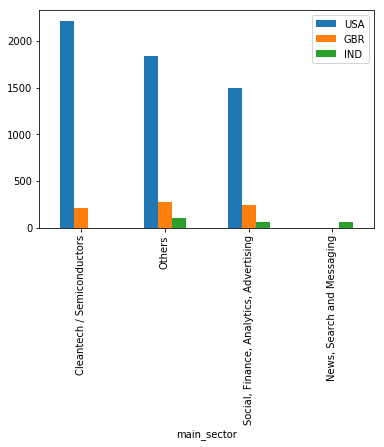

In [84]:
master_frame_plot.plot.bar()

In [87]:
test1_sum = D1.pivot_table(values='raised_amount_usd', index='main_sector',
                         aggfunc=np.sum)
test2_sum = D2.pivot_table(values='raised_amount_usd', index='main_sector',
                         aggfunc=np.sum)
test3_sum = D3.pivot_table(values='raised_amount_usd', index='main_sector',
                         aggfunc=np.sum)
test1_sum

,raised_amount_usd
main_sector,
Automotive & Sports,1.065178e+10
Cleantech / Semiconductors,9.735394e+10
Entertainment,1.520404e+10
Health,2.384800e+10
Manufacturing,1.971492e+10
"News, Search and Messaging",4.079324e+10
Others,6.906240e+10
"Social, Finance, Analytics, Advertising",7.288723e+10


In [91]:
test1 = test1.rename(index=str, columns={"raised_amount_usd":"No. of Investments"})
test2 = test2.rename(index=str, columns={"raised_amount_usd":"No. of Investments"})
test3 = test3.rename(index=str, columns={"raised_amount_usd":"No. of Investments"})
#test1
#Total_no_of_investments of USA
print(test1.sum())
#Total_no_of_investments of GBR
print(test2.sum())
#Total_no_of_investments of IND
print(test3.sum())
#test3

No. of Investments    9230.0
dtype: float64
No. of Investments    1096.0
dtype: float64
No. of Investments    392.0
dtype: float64


In [89]:
test1_sum = test1_sum.rename(index=str, columns={"raised_amount_usd":"Total amount Invested"})
test2_sum = test2_sum.rename(index=str, columns={"raised_amount_usd":"Total amount Invested"})
test3_sum = test3_sum.rename(index=str, columns={"raised_amount_usd":"Total amount Invested"})
test3_sum
#Total amount invested in USA
print("{:.8f}".format(float(test1_sum.sum())))
#Total amount invested in GBR
print("{:.8f}".format(float(test2_sum.sum())))
#Total amount invested in IND
print("{:.8f}".format(float(test3_sum.sum())))

349515557759.00000000
14278327759.00000000
12701077848.00000000


In [92]:
master_D1 = pd.merge(test1,D1,how = 'inner',left_on = 'main_sector',right_on = 'main_sector')
master_D2 = pd.merge(test2,D2,how = 'inner',left_on = 'main_sector',right_on = 'main_sector')
master_D3 = pd.merge(test3,D3,how = 'inner',left_on = 'main_sector',right_on = 'main_sector')
master_D3
master_D1 = pd.merge(test1_sum,master_D1,how = 'inner',left_on = 'main_sector',right_on = 'main_sector')
master_D2 = pd.merge(test2_sum,master_D2,how = 'inner',left_on = 'main_sector',right_on = 'main_sector')
master_D3 = pd.merge(test3_sum,master_D3,how = 'inner',left_on = 'main_sector',right_on = 'main_sector')
master_D3

,main_sector,Total amount Invested,No. of Investments,permalink,name,homepage_url,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector
0,Automotive & Sports,1.468850e+09,22.0,/organization/ani-technologies,Ola,http://www.olacabs.com,operating,IND,28,Kolkata,Kolkata,03-12-2010,/organization/ani-technologies,/funding-round/1e2b54335e2a41d8d7db25b7c11db399,venture,A,10-04-2012,5000000.0,Automotive
1,Automotive & Sports,1.468850e+09,22.0,/organization/ani-technologies,Ola,http://www.olacabs.com,operating,IND,28,Kolkata,Kolkata,03-12-2010,/organization/ani-technologies,/funding-round/3722a5bf71ee371f98e83fe2dd04596d,venture,D,25-10-2014,210000000.0,Automotive
2,Automotive & Sports,1.468850e+09,22.0,/organization/ani-technologies,Ola,http://www.olacabs.com,operating,IND,28,Kolkata,Kolkata,03-12-2010,/organization/ani-technologies,/funding-round/b6d53e0d0ecf4b720d5a8306e20d97fd,venture,F,17-11-2015,500000000.0,Automotive
3,Automotive & Sports,1.468850e+09,22.0,/organization/ani-technologies,Ola,http://www.olacabs.com,operating,IND,28,Kolkata,Kolkata,03-12-2010,/organization/ani-technologies,/funding-round/bbce7c1d8470d24a5b05375a1e58a34e,venture,E,15-04-2015,400000000.0,Automotive
4,Automotive & Sports,1.468850e+09,22.0,/organization/ani-technologies,Ola,http://www.olacabs.com,operating,IND,28,Kolkata,Kolkata,03-12-2010,/organization/ani-technologies,/funding-round/d585974a6ae7ca30ff102a0691ab2c1b,venture,B,12-11-2013,20000000.0,Automotive
5,Automotive & Sports,1.468850e+09,22.0,/organization/ani-technologies,Ola,http://www.olacabs.com,operating,IND,28,Kolkata,Kolkata,03-12-2010,/organization/ani-technologies,/funding-round/e0e7c05049288bed3a9abf6741d7b6f4,venture,C,09-07-2014,41500000.0,Automotive
6,Automotive & Sports,1.468850e+09,22.0,/organization/ather-energy,Ather Energy,http://www.atherenergy.com,operating,IND,19,Bangalore,Bangalore,01-04-2013,/organization/ather-energy,/funding-round/a3782f52b69e60629bcf7866ca8b1eca,venture,A,29-05-2015,12000000.0,Automotive
7,Automotive & Sports,1.468850e+09,22.0,/organization/cardekho,Cardekho,http://www.cardekho.com/,operating,IND,10,New Delhi,Gurgaon,01-01-2005,/organization/cardekho,/funding-round/114450a0282f2d932205b6dd07000cfd,venture,B,28-01-2015,50000000.0,Automotive
8,Automotive & Sports,1.468850e+09,22.0,/organization/cardekho,Cardekho,http://www.cardekho.com/,operating,IND,10,New Delhi,Gurgaon,01-01-2005,/organization/cardekho,/funding-round/3875ae874b0511ede2f7d8597e0d126f,venture,A,27-11-2013,15000000.0,Automotive
9,Automotive & Sports,1.468850e+09,22.0,/organization/cartrade,CarTrade,http://CarTrade.com,operating,IND,16,Mumbai,Mumbai,01-01-2009,/organization/cartrade,/funding-round/7cf3151be5db777f873acad991375f1c,venture,NaN,13-10-2014,30200000.0,Automotive


In [93]:
#Calculating Highest Investment
#max_invest_IND = master_D3.loc[master_D3['Total amount Invested'].idxmax()]
#Cleantech / Semiconductors and Others for USA
master_D1_Cleantech = master_D1.loc[(master_D1['main_sector'] == 'Cleantech / Semiconductors')]
master_D1_Cleantech
master_D1_others = master_D1.loc[(master_D1['main_sector'] == 'Others')]
master_D1_others
# Others and Social, Finance, Analytics, Advertising for GBR
master_D2_others = master_D2.loc[(master_D2['main_sector'] == 'Others')]
master_D2_others
master_D2_sfaa = master_D2.loc[(master_D2['main_sector'] == 'Social, Finance, Analytics, Advertising')]
master_D2_sfaa
# Others and Social, Finance, Analytics, Advertising for IND
master_D3_others = master_D3.loc[(master_D3['main_sector'] == 'Others')]
master_D3_others
master_D3_sfaa = master_D3.loc[(master_D3['main_sector'] == 'Social, Finance, Analytics, Advertising')]
master_D3_sfaa

,main_sector,Total amount Invested,No. of Investments,permalink,name,homepage_url,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector
571,"Social, Finance, Analytics, Advertising",1.371066e+09,67.0,/organization/eka-software-solutions,Eka Software Solutions,http://www.ekaplus.com,operating,IND,19,Bangalore,Bangalore,01-01-2004,/organization/eka-software-solutions,/funding-round/2bbd8112aa5429fdf92f13fcb4254f71,venture,NaN,01-01-2005,6000000.0,Analytics
572,"Social, Finance, Analytics, Advertising",1.371066e+09,67.0,/organization/eka-software-solutions,Eka Software Solutions,http://www.ekaplus.com,operating,IND,19,Bangalore,Bangalore,01-01-2004,/organization/eka-software-solutions,/funding-round/7b4c0d627c52b378a7c2b5c2edb10c26,venture,NaN,01-01-2009,10000000.0,Analytics
573,"Social, Finance, Analytics, Advertising",1.371066e+09,67.0,/organization/germin8,Germin8,http://germin8.com,operating,IND,16,Mumbai,Mumbai,01-01-2007,/organization/germin8,/funding-round/19bb27d1dcd5c605530637b083b3149a,venture,A,27-03-2014,3000000.0,Analytics
574,"Social, Finance, Analytics, Advertising",1.371066e+09,67.0,/organization/heckyl,Heckyl,http://www.Heckyl.com,operating,IND,16,Mumbai,Mumbai,09-12-2010,/organization/heckyl,/funding-round/c2a16e7269a34534655183eedd22ee55,venture,B,10-12-2013,3500000.0,Analytics
575,"Social, Finance, Analytics, Advertising",1.371066e+09,67.0,/organization/loginext-solutions,LogiNext Solutions,http://loginextsolutions.com,operating,IND,16,Mumbai,Mumbai,07-10-2014,/organization/loginext-solutions,/funding-round/ae317438267472aa73cb1ac43e66a525,venture,A,22-09-2015,10000000.0,Analytics
576,"Social, Finance, Analytics, Advertising",1.371066e+09,67.0,/organization/manthan-software-services,Manthan Software Services,https://www.manthan.com/,operating,IND,19,Bangalore,Bangalore City,01-01-2004,/organization/manthan-software-services,/funding-round/d7566ed3c88763b2ad5e756111a045ef,venture,D,04-02-2015,60000000.0,Analytics
577,"Social, Finance, Analytics, Advertising",1.371066e+09,67.0,/organization/manthan-systems,Manthan Systems,http://www.manthansystems.com,operating,IND,19,Bangalore,Bangalore,01-01-2003,/organization/manthan-systems,/funding-round/34b5d3d2bbd104d20d1a62a27220739f,venture,A,01-03-2007,5700000.0,Analytics
578,"Social, Finance, Analytics, Advertising",1.371066e+09,67.0,/organization/manthan-systems,Manthan Systems,http://www.manthansystems.com,operating,IND,19,Bangalore,Bangalore,01-01-2003,/organization/manthan-systems,/funding-round/384bb8d8bc2a9a1df097f6a4c60e12dc,venture,B,09-12-2009,15000000.0,Analytics
579,"Social, Finance, Analytics, Advertising",1.371066e+09,67.0,/organization/manthan-systems,Manthan Systems,http://www.manthansystems.com,operating,IND,19,Bangalore,Bangalore,01-01-2003,/organization/manthan-systems,/funding-round/42be51f0d52db92aeb828b2e6b358c30,venture,D,01-01-2013,4000000.0,Analytics
580,"Social, Finance, Analytics, Advertising",1.371066e+09,67.0,/organization/manthan-systems,Manthan Systems,http://www.manthansystems.com,operating,IND,19,Bangalore,Bangalore,01-01-2003,/organization/manthan-systems,/funding-round/7db541211550feab15626b11aa479116,venture,C,15-02-2012,15000000.0,Analytics


In [94]:
#Top 9 Investment Companies in USA in Cleantech / Semiconductors
master_D1_pivot_cleantech = master_D1_Cleantech.pivot_table(values = 'raised_amount_usd', index = 'name',aggfunc = np.sum).sort_values(by ='raised_amount_usd',ascending = False).head(9)
master_D1_pivot_cleantech
#Top 9 Investment Companies in USA in Others
master_D1_pivot_others = master_D1_others.pivot_table(values = 'raised_amount_usd', index = 'name',aggfunc = np.sum).sort_values(by ='raised_amount_usd',ascending = False).head(9)
master_D1_pivot_others
#Top 9 Investment Companies in GBR in Others
master_D2_pivot_others = master_D2_others.pivot_table(values = 'raised_amount_usd', index = 'name',aggfunc = np.sum).sort_values(by ='raised_amount_usd',ascending = False).head(9)
master_D2_pivot_others
#Top 9 Investment Companies in GBR in Social, Finance, Analytics, Advertising
master_D2_pivot_sfaa = master_D2_sfaa.pivot_table(values = 'raised_amount_usd', index = 'name',aggfunc = np.sum).sort_values(by ='raised_amount_usd',ascending = False).head(9)
master_D2_pivot_sfaa
#Top 9 Investment Companies in IND in Others
master_D3_pivot_others = master_D3_others.pivot_table(values = 'raised_amount_usd', index = 'name',aggfunc = np.sum).sort_values(by ='raised_amount_usd',ascending = False).head(9)
master_D3_pivot_others
#op 9 Investment Companies in IND in Social, Finance, Analytics, Advertising
master_D3_pivot_sfaa = master_D3_sfaa.pivot_table(values = 'raised_amount_usd', index = 'name',aggfunc = np.sum).sort_values(by ='raised_amount_usd',ascending = False).head(9)
master_D3_pivot_sfaa

,raised_amount_usd
name,
ShopClues.com,129000000.0
LYCOS Internet Limited,103000000.0
yepme.com,88200000.0
BankBazaar.com,79000000.0
PolicyBazaar,69600000.0
Komli Media,67000000.0
Manthan Software Services,60000000.0
Janalakshmi,57000000.0
Manthan Systems,56700000.0
